Karan Rabidas
<br>
Indian Institute of Technology, Guwahati


---



####Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from collections import Counter
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, r2_score, mean_squared_error
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, precision_recall_curve
import warnings
warnings.filterwarnings("ignore")

####Read Data

In [4]:
df = pd.read_csv("Train_Data.csv")
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,attack
0,0,tcp,netbios_dgm,REJ,0,0,0,0,0,0,...,0.06,0.06,0.00,0.00,0.00,0.0,1.00,1.0,21,neptune
1,0,tcp,smtp,SF,1239,400,0,0,0,0,...,0.45,0.04,0.00,0.00,0.11,0.0,0.02,0.0,18,normal
2,0,tcp,http,SF,222,945,0,0,0,0,...,1.00,0.00,0.02,0.03,0.00,0.0,0.00,0.0,21,normal
3,0,tcp,http,SF,235,1380,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,21,normal
4,0,tcp,uucp_path,REJ,0,0,0,0,0,0,...,0.01,0.08,0.00,0.00,0.00,0.0,1.00,1.0,19,neptune


In [5]:
df.shape

(86845, 43)

In [6]:
df.describe()

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag
count,86845.000000,8.684500e+04,8.684500e+04,86845.000000,86845.0,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,...,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000
mean,104.166872,8.455707e+03,2.732095e+03,0.000046,0.0,0.000035,0.144971,0.000771,0.441142,0.320583,...,123.338269,0.526457,0.050186,0.075810,0.016246,0.324666,0.318934,0.092391,0.091045,20.060522
std,1038.273538,3.582141e+05,5.543041e+04,0.006787,0.0,0.007588,1.837958,0.037009,0.496527,27.993474,...,112.704010,0.447353,0.103323,0.208388,0.055271,0.464291,0.463506,0.282768,0.281452,1.421425
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,12.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000
50%,0.000000,4.600000e+01,4.400000e+01,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,77.000000,0.550000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
75%,0.000000,2.720000e+02,7.680000e+02,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.020000,0.010000,1.000000,1.000000,0.000000,0.000000,21.000000
max,40504.000000,8.958152e+07,7.028652e+06,1.000000,0.0,2.000000,77.000000,4.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


As we can see 'land', 'urgent', 'numfailedlogins', 'numoutboundcmds' have mostly zero values so we can drop these columns.

In [7]:
df.drop(['land','urgent','numfailedlogins','numoutboundcmds'],axis=1,inplace=True)

In [8]:
df.isna().sum()

duration                  0
protocoltype              0
service                   0
flag                      0
srcbytes                  0
dstbytes                  0
wrongfragment             0
hot                       0
loggedin                  0
numcompromised            0
rootshell                 0
suattempted               0
numroot                   0
numfilecreations          0
numshells                 0
numaccessfiles            0
ishostlogin               0
isguestlogin              0
count                     0
srvcount                  0
serrorrate                0
srvserrorrate             0
rerrorrate                0
srvrerrorrate             0
samesrvrate               0
diffsrvrate               0
srvdiffhostrate           0
dsthostcount              0
dsthostsrvcount           0
dsthostsamesrvrate        0
dsthostdiffsrvrate        0
dsthostsamesrcportrate    0
dsthostsrvdiffhostrate    0
dsthostserrorrate         0
dsthostsrvserrorrate      0
dsthostrerrorrate   

In [9]:
df.select_dtypes(exclude=[np.number])

,protocoltype,service,flag,attack
0,tcp,netbios_dgm,REJ,neptune
1,tcp,smtp,SF,normal
2,tcp,http,SF,normal
3,tcp,http,SF,normal
4,tcp,uucp_path,REJ,neptune
...,...,...,...,...
86840,tcp,http,SF,normal
86841,tcp,http,SF,normal
86842,tcp,ftp,SF,normal
86843,tcp,smtp,SF,normal


###Setting attach type: normal=0 and neptune=1

In [10]:
df['attack'].loc[df['attack']!='normal']=1
df['attack'].loc[df['attack']=='normal']=0
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,wrongfragment,hot,loggedin,numcompromised,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,attack
0,0,tcp,netbios_dgm,REJ,0,0,0,0,0,0,...,0.06,0.06,0.00,0.00,0.00,0.0,1.00,1.0,21,1
1,0,tcp,smtp,SF,1239,400,0,0,1,0,...,0.45,0.04,0.00,0.00,0.11,0.0,0.02,0.0,18,0
2,0,tcp,http,SF,222,945,0,0,1,0,...,1.00,0.00,0.02,0.03,0.00,0.0,0.00,0.0,21,0
3,0,tcp,http,SF,235,1380,0,0,1,0,...,1.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,21,0
4,0,tcp,uucp_path,REJ,0,0,0,0,0,0,...,0.01,0.08,0.00,0.00,0.00,0.0,1.00,1.0,19,1


####Convert categorical data into numerical data

In [11]:
le=LabelEncoder()

In [12]:
#Each unique category in a column will be assigned a unique integer
df['protocoltype']=le.fit_transform(df['protocoltype'])
df['service']=le.fit_transform(df['service'])
df['flag']=le.fit_transform(df['flag'])
df['attack']=le.fit_transform(df['attack'])

#### Distribution of Features

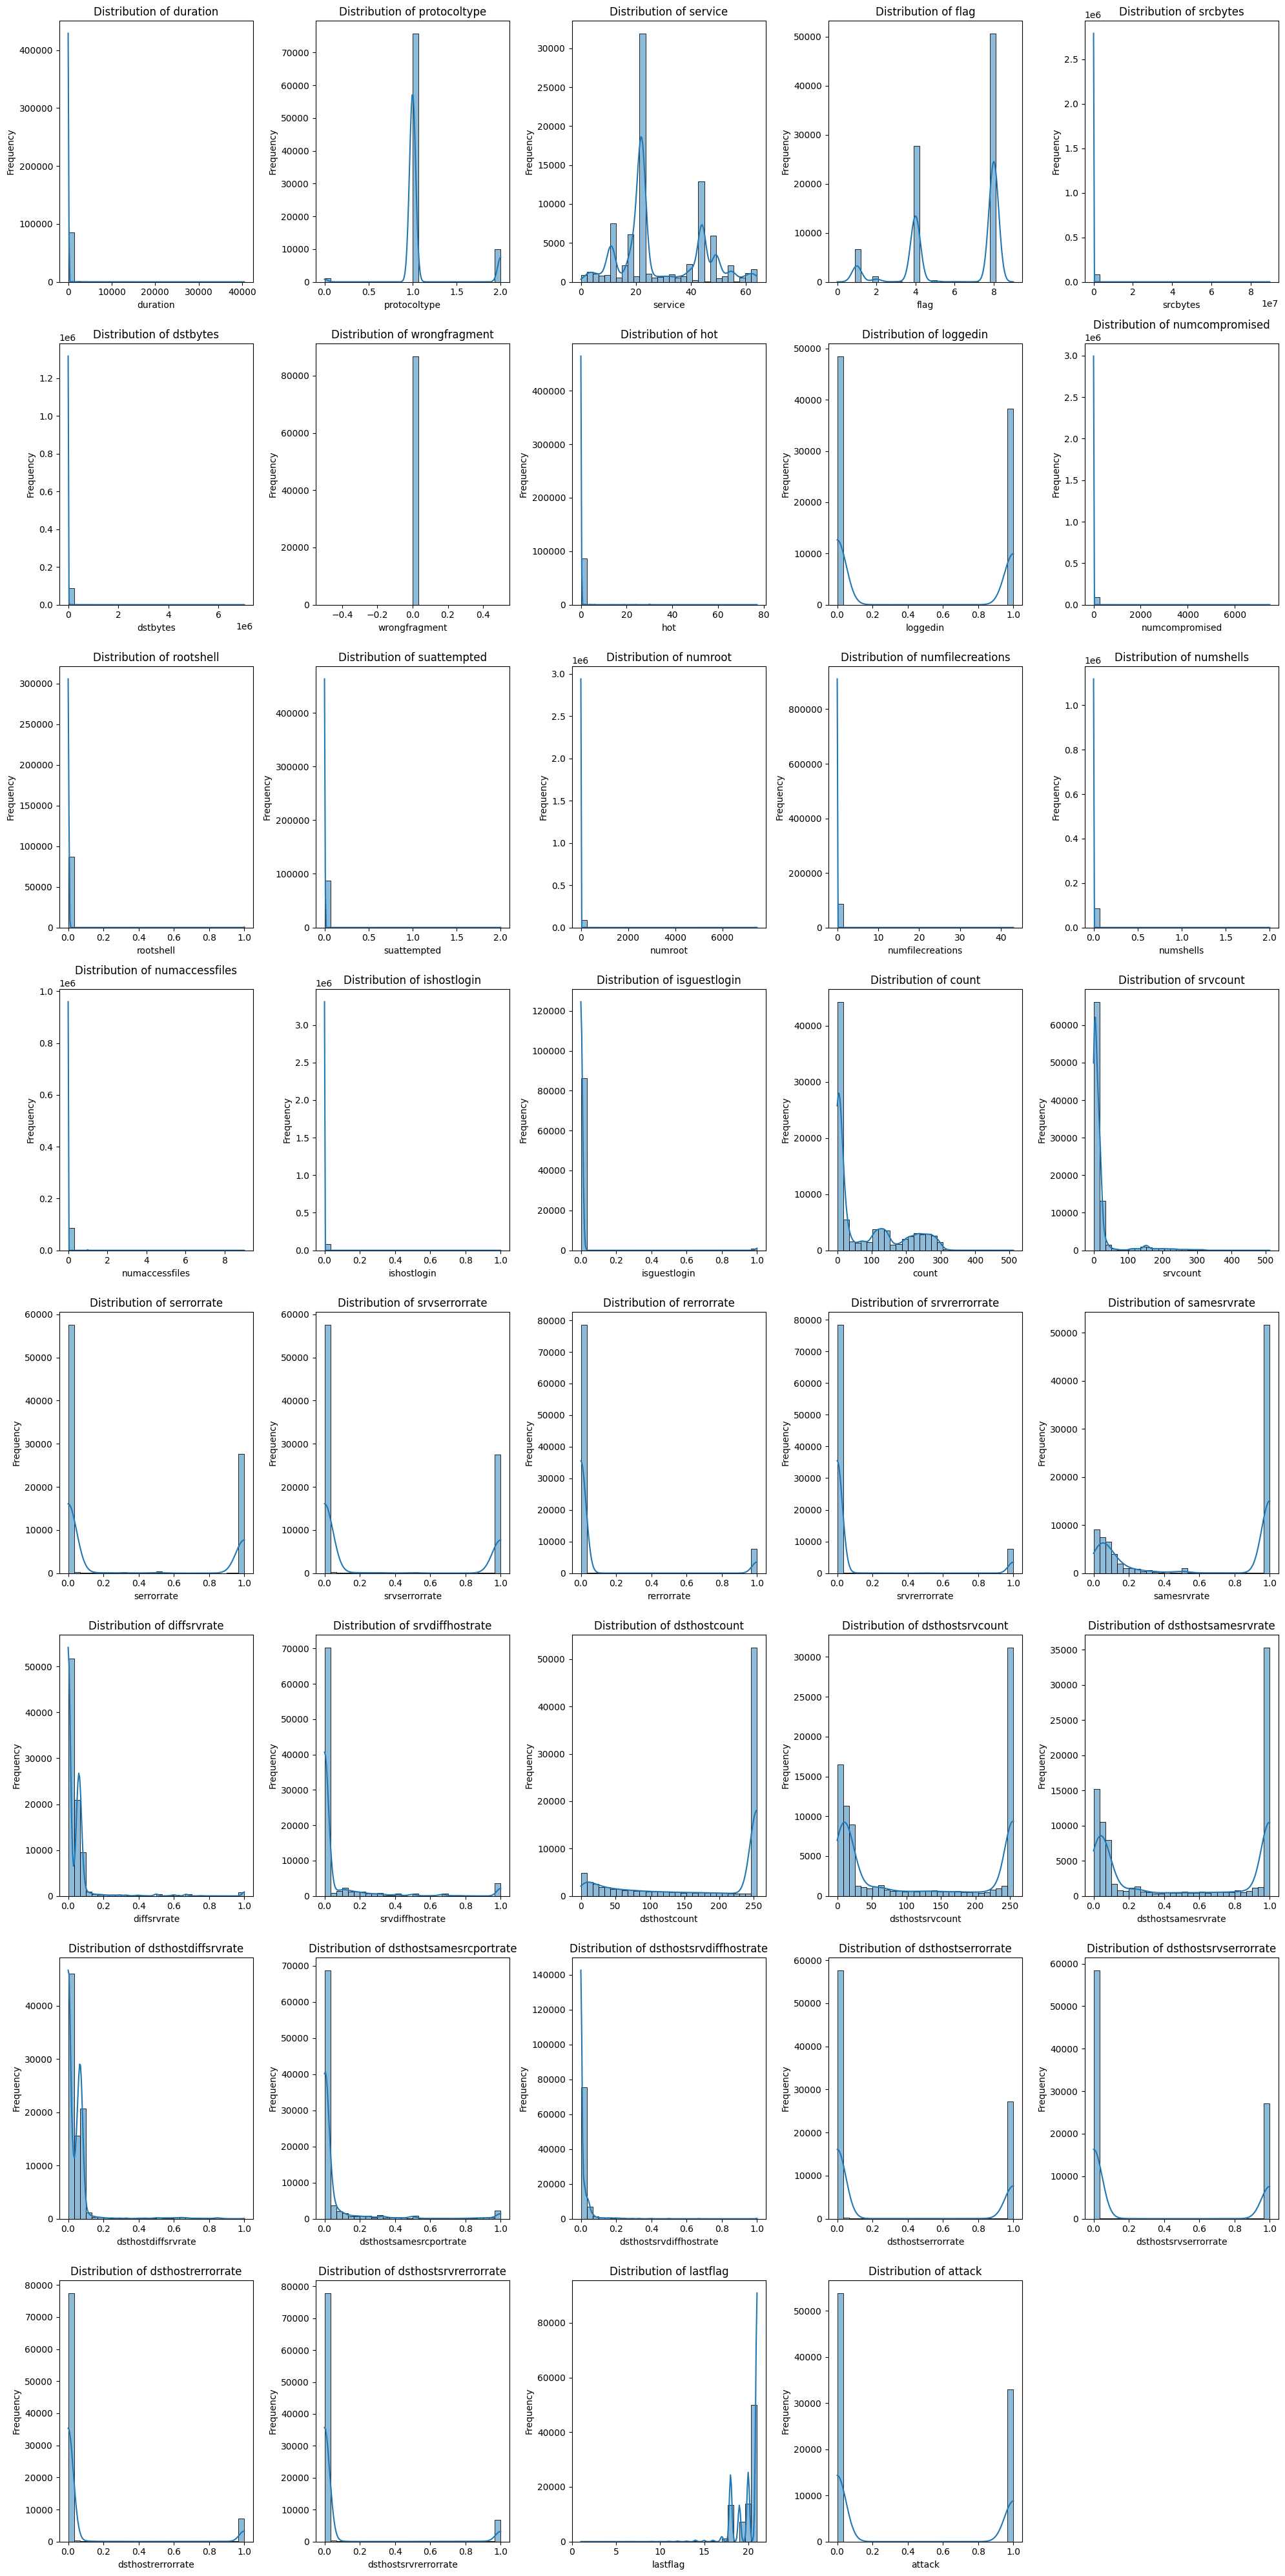

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the list of all numerical features in the dataset
numerical_features = df.select_dtypes(include=[np.number]).columns

# Determine the number of plots per row and calculate total rows needed
plots_per_row = 5
total_plots = len(numerical_features)
total_rows = (total_plots // plots_per_row) + int(total_plots % plots_per_row != 0)

# Set the figure size based on the number of plots
plt.figure(figsize=(20, total_rows * 5))

# Loop through each numerical feature and plot its distribution
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(total_rows, plots_per_row, i)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


###Heat Map

<Axes: >

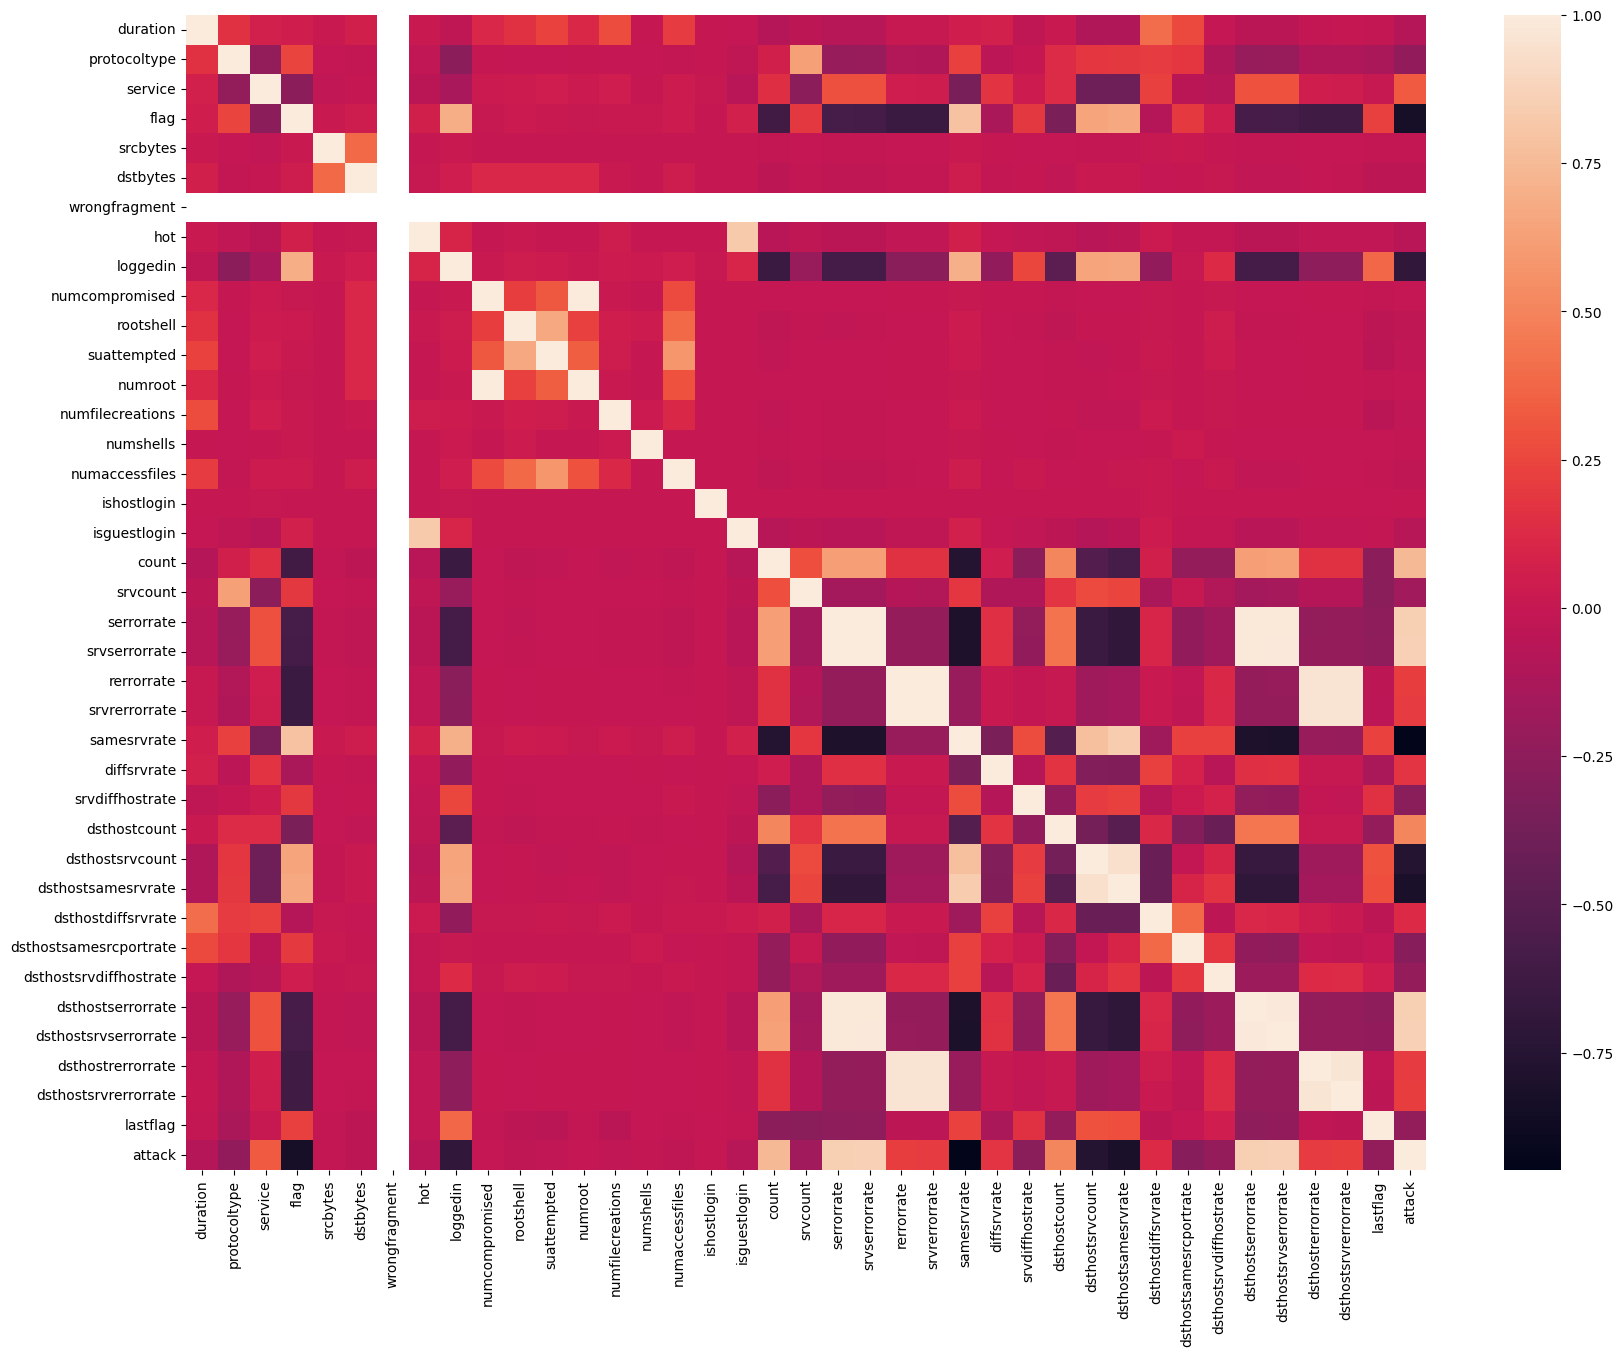

In [14]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr())

#### Attack Type Distribution

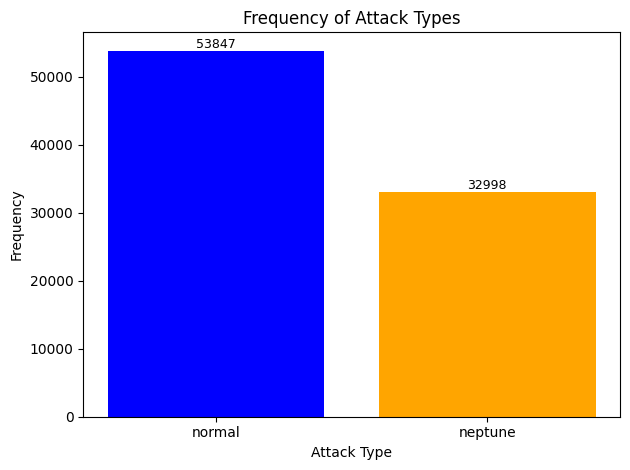

In [15]:
# Count the occurrences of each category
counts = df['attack'].value_counts()

# Create a bar plot
bars = plt.bar(counts.index, counts.values, color=['blue', 'orange'])

# Set labels and title
plt.xlabel('Attack Type')
plt.ylabel('Frequency')
plt.title('Frequency of Attack Types')

# Set x-axis ticks and labels
plt.xticks(ticks=[0, 1], labels=['normal', 'neptune'])

# Add frequency counts on top of each bar
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count,
             ha='center', va='bottom', fontsize=9, color='black')

# Show plot
plt.tight_layout()
plt.show()

## Model Development and Model Selection

### Data splitting

In [16]:
from sklearn.model_selection import train_test_split

# Assuming 'attack' is your target variable and other columns are features
X = df.drop(['attack'], axis=1)
y = df['attack']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data
scaler.fit(X_train)

# Transform both training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

###Model 1: Random Forest Classifier

In [17]:
# Initialize Random Forest Classifier model
rf = RandomForestClassifier(random_state=42)

# Train the model on the scaled training data
rf.fit(X_train_scaled, y_train)

# Predict on the scaled testing data
y_pred_rf = rf.predict(X_test_scaled)

# Evaluate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy (Random forest classifier):", accuracy_rf)

Accuracy (Random forest classifier): 1.0


###Model 2: Logistic Regression

In [18]:
# Initialize Logistic Regression model
lr = LogisticRegression(random_state=42)

# Train the model on the scaled training data
lr.fit(X_train_scaled, y_train)

# Predict on the scaled testing data
y_pred_lr = lr.predict(X_test_scaled)

# Evaluate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy (Logistic Regression):", accuracy_lr)


Accuracy (Logistic Regression): 0.999712130807761


###Model 3: Decision tree classifier

In [19]:
# Initialize Decision Tree Classifier model
dt = DecisionTreeClassifier(random_state=42)

# Train the model on the scaled training data
dt.fit(X_train_scaled, y_train)

# Predict on the scaled testing data
y_pred_dt = dt.predict(X_test_scaled)

# Evaluate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy (Decision Tree Classifier):", accuracy_dt)


Accuracy (Decision Tree Classifier): 0.9995969831308653


### Performace scores of each model

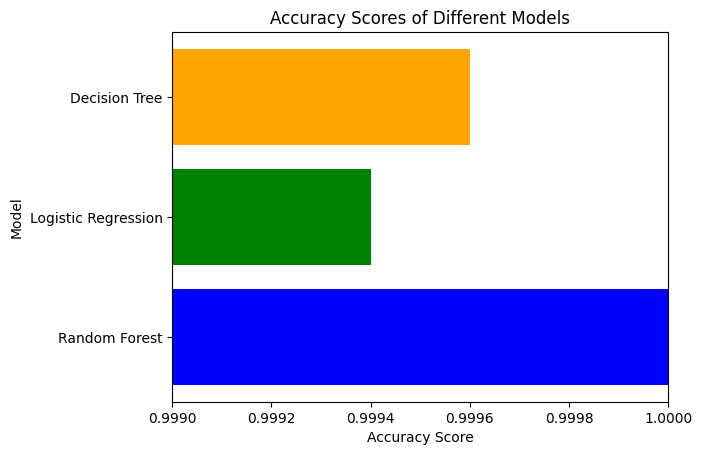

In [20]:
import matplotlib.pyplot as plt
models = ['Random Forest', 'Logistic Regression', 'Decision Tree']
accuracy_scores = [1, 0.9994, 0.9996]

plt.barh(models, accuracy_scores, color=['blue', 'green', 'orange'])
plt.xlabel('Accuracy Score')
plt.ylabel('Model')
plt.title('Accuracy Scores of Different Models')
plt.xlim(0.999, 1.0)  # Set x-axis limits for better visualization
plt.show()


####We can select Random forest classifier as the final model for its best performance score

#### Feature importance (to see which features contribute most to the model’s decisions)

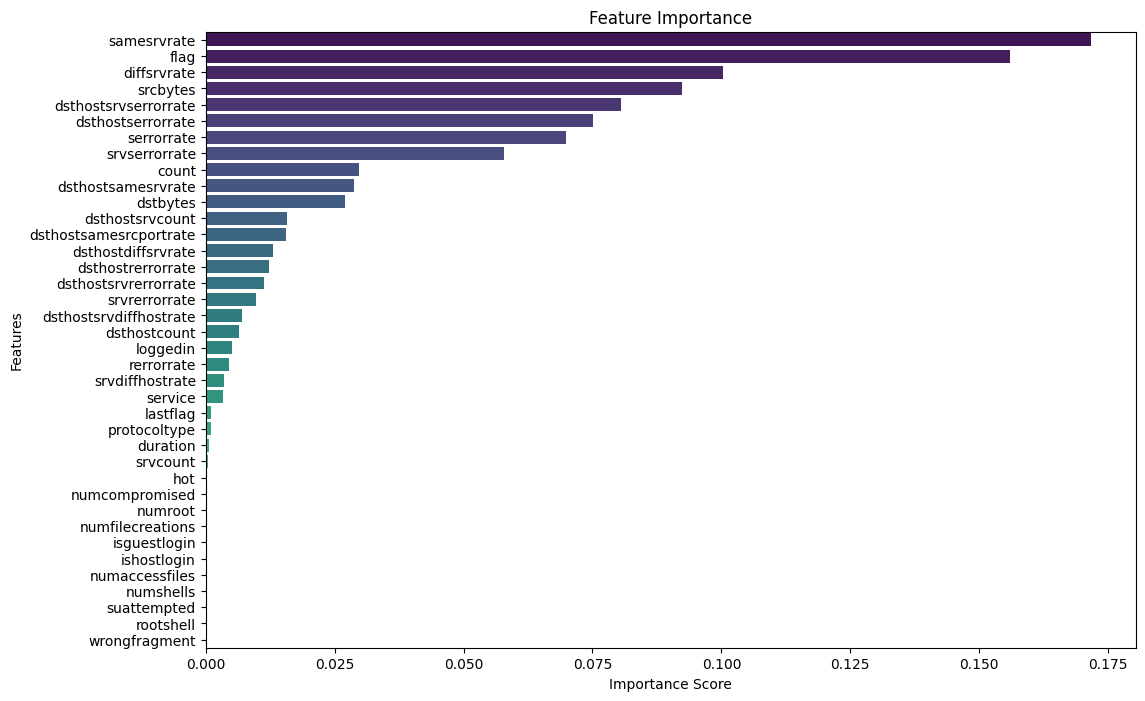

In [21]:
# Plotting feature importance
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

####Classification Report

In [22]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10762
           1       1.00      1.00      1.00      6607

    accuracy                           1.00     17369
   macro avg       1.00      1.00      1.00     17369
weighted avg       1.00      1.00      1.00     17369



####ROC Curve

ROC AUC Score: 1.0


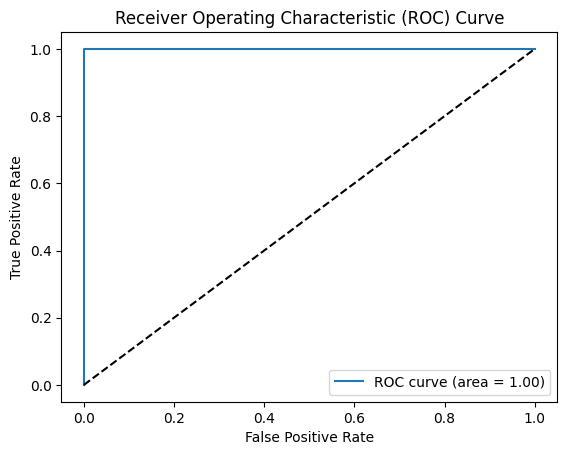

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score # Import roc_curve

# Predict probabilities for ROC AUC
y_pred_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba_rf)
print("ROC AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Training Random forest on whole Train_Data.csv

In [24]:
import joblib  # For saving the trained model

X_train = df.drop(['attack'], axis=1)
y_train = df['attack']

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Fit the model on the entire training data
rf.fit(X_train, y_train)

print("Random Forest Classifier trained successfully.")

Random Forest Classifier trained successfully.


#### Prediction on Test_data.csv

In [25]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler  # If scaling was used in training

# Load Test_Data.csv (assuming it doesn't have the target column)
df = pd.read_csv('Test_Data.csv')

In [26]:
df.shape

(21712, 42)

In [27]:
df.drop(['land','urgent','numfailedlogins','numoutboundcmds'],axis=1,inplace=True)


In [28]:
le=LabelEncoder()
df['protocoltype']=le.fit_transform(df['protocoltype'])
df['service']=le.fit_transform(df['service'])
df['flag']=le.fit_transform(df['flag'])

####Obtaining Submission file as output.csv

In [29]:
# Predict using the loaded model
y_pred = rf.predict(df)

# Create DataFrame for predictions
output_df = pd.DataFrame({'attack': y_pred})

# Save predictions to 'output.csv' file
output_df.to_csv('output.csv', index=False)

print("Predictions saved to output.csv")

Predictions saved to output.csv


<hr><hr>